<a href="https://colab.research.google.com/github/CaptLuckyTiger/MemoTask/blob/main/Trabalho_de_Intelig%C3%AAncia_de_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapa e heurísticas

# Parte 1: Definindo o mapa real do Brasil e as heurísticas

In [ ]:


# Mapa real das capitais do Brasil (rodoviário)
mapa = {
    'Aracaju':{'Salvador': 356, 'Maceió': 294, 'Recife': 501},
    'Belém': {'Macapá': 500 + 329, 'Palmas': 1273, 'São Luís': 806},
    'Belo Horizonte': {'Rio de Janeiro': 434, 'São Paulo': 586, 'Vitória': 524, 'Brasília': 624, 'Goiânia': 788},
    'Boa Vista': {'Manaus': 785},
    'Brasília': {'Goiânia': 209, 'Campo Grande': 1134, 'Belo Horizonte': 624, 'Cuiabá': 1133, 'Palmas': 873},
    'Campo Grande': {'Cuiabá': 694, 'Goiânia': 895, 'São Paulo': 1014},
    'Cuiabá': {'Campo Grande': 694, 'Brasília': 1133, 'Porto Velho': 1455},
    'Curitiba': {'São Paulo': 408, 'Florianópolis': 300, 'Porto Alegre': 711},
    'Florianópolis': {'Curitiba': 300, 'Porto Alegre': 476},
    'Fortaleza': {'Natal': 537, 'Teresina': 634, 'São Luís': 1075},
    'Goiânia': {'Brasília': 209, 'Campo Grande': 895, 'Belo Horizonte': 788, 'Palmas': 874},
    'João Pessoa': {'Recife': 120, 'Natal': 185},
    'Macapá': {'Belém': 500 + 329},
    'Maceió': {'Recife': 285, 'Aracaju': 294},
    'Manaus': {'Boa Vista': 785, 'Porto Velho': 901},
    'Natal': {'João Pessoa': 185, 'Fortaleza': 537},
    'Palmas': {'Brasília': 873, 'Goiânia': 874, 'Belém': 1273},
    'Porto Alegre': {'Curitiba': 711, 'Florianópolis': 476},
    'Porto Velho': {'Manaus': 901, 'Cuiabá': 1455, 'Rio Branco': 544},
    'Recife': {'João Pessoa': 120, 'Maceió': 285, 'Aracaju': 501},
    'Rio Branco': {'Porto Velho': 544},
    'Rio de Janeiro': {'São Paulo': 429, 'Belo Horizonte': 434, 'Vitória': 521},
    'Salvador': {'Aracaju': 356, 'Maceió': 632, 'Brasília': 1445},
    'São Luís': {'Teresina': 446, 'Fortaleza': 1075, 'Belém': 806},
    'São Paulo': {'Rio de Janeiro': 429, 'Curitiba': 408, 'Campo Grande': 1014},
    'Teresina': {'Fortaleza': 634, 'São Luís': 446},
    'Vitória': {'Rio de Janeiro': 521, 'Belo Horizonte': 524},
}

# --------------------------------------------------------

# Heurísticas para o A* (simulações)

# Heurística 1: Distância em linha reta
heuristica_distancia = {
    'Aracaju': 2000, 'Belém': 1300, 'Belo Horizonte': 800, 'Boa Vista': 3500, 'Brasília': 500,
    'Campo Grande': 1400, 'Cuiabá': 1600, 'Curitiba': 1000, 'Florianópolis': 1200, 'Fortaleza': 2200,
    'Goiânia': 700, 'João Pessoa': 2100, 'Macapá': 1800, 'Maceió': 1900, 'Manaus': 3200,
    'Natal': 2150, 'Palmas': 1000, 'Porto Alegre': 1600, 'Porto Velho': 2800, 'Recife': 2050,
    'Rio Branco': 3000, 'Rio de Janeiro': 600, 'Salvador': 1700, 'São Luís': 1700,
    'São Paulo': 400, 'Teresina': 1900, 'Vitória': 700
}

# Heurística 2: Tráfego de veículos entre as capitais
heuristica_trafego = {
    'Aracaju': 5, 'Belém': 8, 'Belo Horizonte': 4, 'Boa Vista': 9, 'Brasília': 3,
    'Campo Grande': 6, 'Cuiabá': 7, 'Curitiba': 3, 'Florianópolis': 4, 'Fortaleza': 8,
    'Goiânia': 4, 'João Pessoa': 7, 'Macapá': 9, 'Maceió': 6, 'Manaus': 9,
    'Natal': 7, 'Palmas': 5, 'Porto Alegre': 4, 'Porto Velho': 8, 'Recife': 7,
    'Rio Branco': 9, 'Rio de Janeiro': 5, 'Salvador': 6, 'São Luís': 8,
    'São Paulo': 5, 'Teresina': 7, 'Vitória': 4
}

# Heurística 3: Custo de pedágios estimado entre capitais
heuristica_pedagio = {
    'Aracaju': 30, 'Belém': 45, 'Belo Horizonte': 25, 'Boa Vista': 60, 'Brasília': 20,
    'Campo Grande': 35, 'Cuiabá': 40, 'Curitiba': 25, 'Florianópolis': 30, 'Fortaleza': 50,
    'Goiânia': 25, 'João Pessoa': 40, 'Macapá': 55, 'Maceió': 35, 'Manaus': 60,
    'Natal': 40, 'Palmas': 30, 'Porto Alegre': 35, 'Porto Velho': 50, 'Recife': 40,
    'Rio Branco': 55, 'Rio de Janeiro': 30, 'Salvador': 35, 'São Luís': 45,
    'São Paulo': 30, 'Teresina': 40, 'Vitória': 25
}

# Volume de tráfego (quanto maior, pior)
heuristica_trafego = {
    cidade: (i % 10) * 100 for i, cidade in enumerate(mapa.keys())
}

# Valor de pedágios (valor aproximado)
heuristica_pedagio = {
    cidade: (i % 5) * 50 for i, cidade in enumerate(mapa.keys())
}







# Parte 2 Funções de busca

In [ ]:


from collections import deque

def busca_largura(origem, destino):
    visitados = set()
    fila = deque([[origem]])
    while fila:
        caminho = fila.popleft()
        atual = caminho[-1]
        if atual == destino:
            return caminho, len(visitados)
        if atual not in visitados:
            visitados.add(atual)
            for vizinho in mapa.get(atual, []):
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                fila.append(novo_caminho)
    return None, len(visitados)

def busca_profundidade(origem, destino):
    visitados = set()
    pilha = [[origem]]
    while pilha:
        caminho = pilha.pop()
        atual = caminho[-1]
        if atual == destino:
            return caminho, len(visitados)
        if atual not in visitados:
            visitados.add(atual)
            for vizinho in mapa.get(atual, []):
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                pilha.append(novo_caminho)
    return None, len(visitados)

def busca_a_estrela(origem, destino, heuristica_escolhida):
    from heapq import heappop, heappush
    visitados = set()
    fila = []
    heappush(fila, (0 + heuristica_escolhida[origem], [origem]))
    while fila:
        custo_total, caminho = heappop(fila)
        atual = caminho[-1]
        if atual == destino:
            return caminho, len(visitados)
        if atual not in visitados:
            visitados.add(atual)
            for vizinho in mapa.get(atual, []):
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                custo = sum(mapa[caminho[i]][caminho[i+1]] for i in range(len(caminho)-1)) + mapa[atual][vizinho]
                heappush(fila, (custo + heuristica_escolhida[vizinho], novo_caminho))
    return None, len(visitados)

def distancia_total(caminho):
    if not caminho:
        return 0
    distancia = 0
    for i in range(len(caminho) - 1):
        distancia += mapa[caminho[i]][caminho[i+1]]
    return distancia


#Parte 3 Programa prncipial

In [ ]:


# Escolha do usuário
origem = input("Digite a cidade de origem: ").strip().title()
destino = input("Digite a cidade de destino: ").strip().title()

# Execução das buscas
caminho_bfs, visitados_bfs = busca_largura(origem, destino)
caminho_dfs, visitados_dfs = busca_profundidade(origem, destino)
caminho_a_dist, visitados_a_dist = busca_a_estrela(origem, destino, heuristica_distancia)
caminho_a_trafego, visitados_a_trafego = busca_a_estrela(origem, destino, heuristica_trafego)
caminho_a_pedagio, visitados_a_pedagio = busca_a_estrela(origem, destino, heuristica_pedagio)

# Resultados
print("\n--- Resultados ---")

if caminho_bfs:
    print(f"\nBFS:\nCaminho: {caminho_bfs}\nVisitados: {visitados_bfs}\nDistância: {distancia_total(caminho_bfs)} km")
else:
    print("BFS: Caminho não encontrado.")

if caminho_dfs:
    print(f"\nDFS:\nCaminho: {caminho_dfs}\nVisitados: {visitados_dfs}\nDistância: {distancia_total(caminho_dfs)} km")
else:
    print("DFS: Caminho não encontrado.")

if caminho_a_dist:
    print(f"\nA* (Distância):\nCaminho: {caminho_a_dist}\nVisitados: {visitados_a_dist}\nDistância: {distancia_total(caminho_a_dist)} km")
else:
    print("A* (Distância): Caminho não encontrado.")

if caminho_a_trafego:
    print(f"\nA* (Tráfego):\nCaminho: {caminho_a_trafego}\nVisitados: {visitados_a_trafego}\nDistância: {distancia_total(caminho_a_trafego)} km")
else:
    print("A* (Tráfego): Caminho não encontrado.")

if caminho_a_pedagio:
    print(f"\nA* (Pedágio):\nCaminho: {caminho_a_pedagio}\nVisitados: {visitados_a_pedagio}\nDistância: {distancia_total(caminho_a_pedagio)} km")
else:
    print("A* (Pedágio): Caminho não encontrado.")

Digite a cidade de origem (sigla): Aracaju
Digite a cidade de destino (sigla): Vitória

--- Resultados ---

BFS:
Caminho: ['Aracaju', 'Salvador', 'Brasília', 'Belo Horizonte', 'Vitória']
Visitados: 14
Distância: 2949 km

DFS:
Caminho: ['Aracaju', 'Recife', 'João Pessoa', 'Natal', 'Fortaleza', 'São Luís', 'Belém', 'Palmas', 'Goiânia', 'Belo Horizonte', 'Brasília', 'Cuiabá', 'Campo Grande', 'São Paulo', 'Rio de Janeiro', 'Vitória']
Visitados: 23
Distância: 10574 km

A* (Distância):
Caminho: ['Aracaju', 'Salvador', 'Brasília', 'Belo Horizonte', 'Vitória']
Visitados: 12
Distância: 2949 km

A* (Tráfego):
Caminho: ['Aracaju', 'Salvador', 'Brasília', 'Belo Horizonte', 'Vitória']
Visitados: 18
Distância: 2949 km

A* (Pedágio):
Caminho: ['Aracaju', 'Salvador', 'Brasília', 'Belo Horizonte', 'Vitória']
Visitados: 16
Distância: 2949 km


#Parte 4 Tabelas e Gráficos


--- Comparativo ---


,Método,Cidades Visitadas,Distância Percorrida (km)
0,BFS,14,2949
1,DFS,23,10574
2,A* (Distância),12,2949
3,A* (Tráfego),18,2949
4,A* (Pedágio),16,2949


<ipython-input-15-7b28223f6240>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tabela['Método'], rotation=45, ha='right')
<ipython-input-15-7b28223f6240>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(tabela['Método'], rotation=45, ha='right')


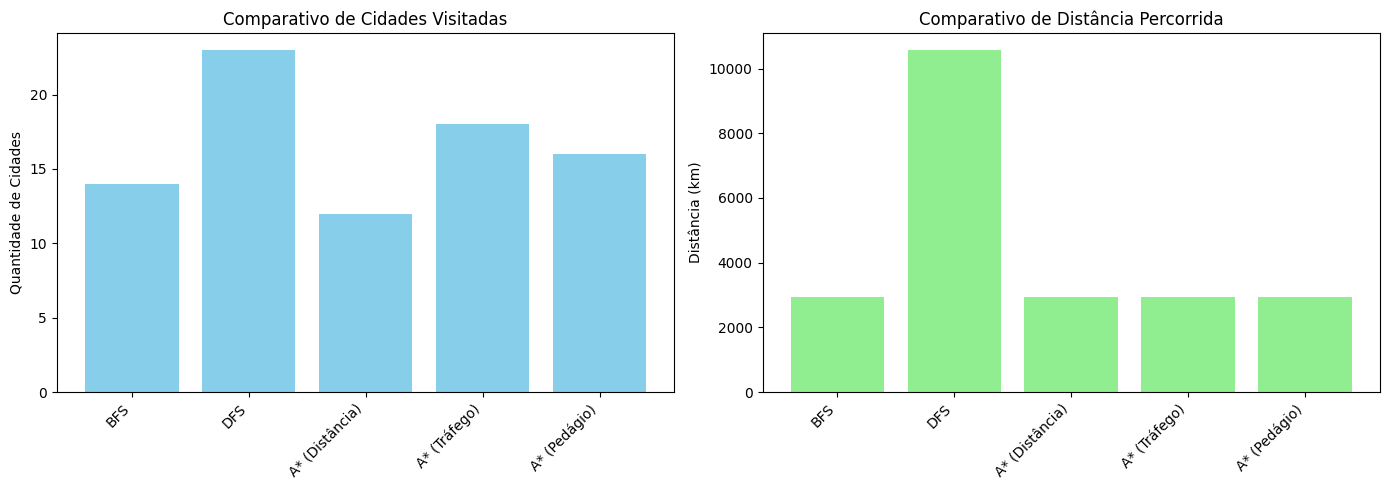

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Criar a tabela
dados = {
    'Método': ['BFS', 'DFS', 'A* (Distância)', 'A* (Tráfego)', 'A* (Pedágio)'],
    'Cidades Visitadas': [visitados_bfs, visitados_dfs, visitados_a_dist, visitados_a_trafego, visitados_a_pedagio],
    'Distância Percorrida (km)': [
        distancia_total(caminho_bfs) if caminho_bfs else 0,
        distancia_total(caminho_dfs) if caminho_dfs else 0,
        distancia_total(caminho_a_dist) if caminho_a_dist else 0,
        distancia_total(caminho_a_trafego) if caminho_a_trafego else 0,
        distancia_total(caminho_a_pedagio) if caminho_a_pedagio else 0
    ]
}

tabela = pd.DataFrame(dados)

# Exibir a tabela
print("\n--- Comparativo ---")
display(tabela)

# Criar o gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Cidades Visitadas
axes[0].bar(tabela['Método'], tabela['Cidades Visitadas'], color='skyblue')
axes[0].set_title('Comparativo de Cidades Visitadas')
axes[0].set_ylabel('Quantidade de Cidades')
axes[0].set_xticklabels(tabela['Método'], rotation=45, ha='right')

# Gráfico 2: Distância Percorrida
axes[1].bar(tabela['Método'], tabela['Distância Percorrida (km)'], color='lightgreen')
axes[1].set_title('Comparativo de Distância Percorrida')
axes[1].set_ylabel('Distância (km)')
axes[1].set_xticklabels(tabela['Método'], rotation=45, ha='right')

plt.tight_layout()
plt.show()
